/usr/local/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


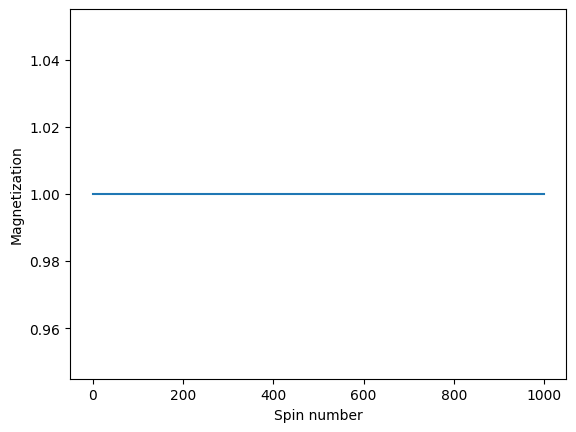

In [5]:
import numpy as np
import matplotlib.pyplot as plt

N_spins = 1000  # Number of spins in the phantom
phantom = np.ones(N_spins, dtype=np.complex128)  # All spins start in equilibrium state

# Plot the initial state of the phantom
plt.figure()
plt.plot(phantom)
plt.xlabel('Spin number')
plt.ylabel('Magnetization')
plt.show()


gamma = 42.58e6  # Gyromagnetic ratio for hydrogen in Hz/T
G = 1e-3  # Gradient strength in T/m

B0 = np.linspace(0.9, 1.1, N_spins)  # B0 field, non-uniform
B0 = B0 + 0.01 * np.random.randn(N_spins)  # Add some random noise for realism



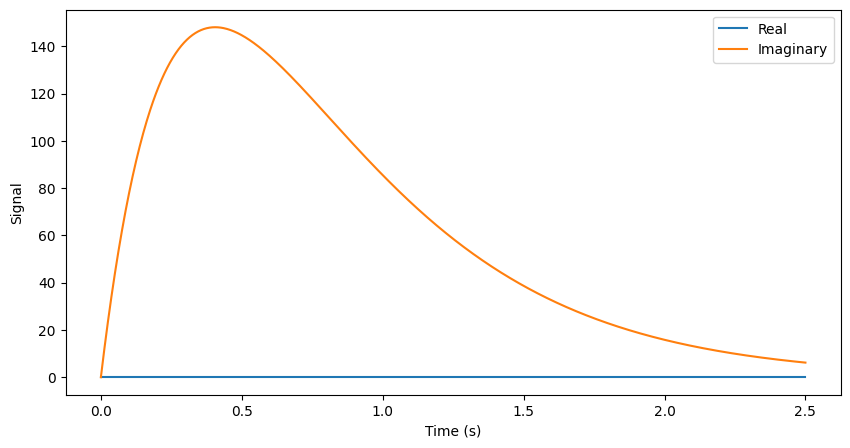

In [6]:
angle = np.pi / 2  # 90 degree flip
phantom *= np.exp(1j * angle)  # Rotate each spin by 90 degrees
T1 = 1.0  # T1 relaxation time
T2 = 0.5  # T2 relaxation time

times = np.linspace(0, 5 * T2, 1000)  # Times at which to sample the signal
signal = np.zeros_like(times, dtype=np.complex128)

for i, t in enumerate(times):
    M1 = 1 - np.exp(-t / T1)
    M2 = np.exp(-t / T2)
    signal[i] = np.sum(phantom * M1 * M2)  # Signal is sum of all spins, with relaxation


# Apply a 180 degree pulse to create a spin echo
#echo_time = times[int(len(times)/2)]  # Time at which to apply the 180 degree pulse
#echo_angle = np.pi  # 180 degree flip
#echo_phase = np.exp(1j * echo_angle)  # Phase shift due to 180 degree pulse
#echo_index = np.argmin(np.abs(times - echo_time))  # Index of the echo time in the times array
#signal[echo_index:] *= echo_phase  # Apply the phase shift to the signal after the echo time

#Plotting M1 and M2
plt.figure(figsize=(10, 5))
plt.plot(times, signal.real, label='Real')
plt.plot(times, signal.imag, label='Imaginary')
plt.xlabel('Time (s)')
plt.ylabel('Signal')
plt.legend()
plt.show()

Gx = 1.0  # Strength of the gradient field

# Apply the gradient field
for i in range(N_spins):
    signal *= np.exp(-1j * Gx * i * times)  # Frequency shift due to gradient
    #signal *= np.exp(-1j * 2 * np.pi * B0[i] * times)  # Phase shift due to B0 field


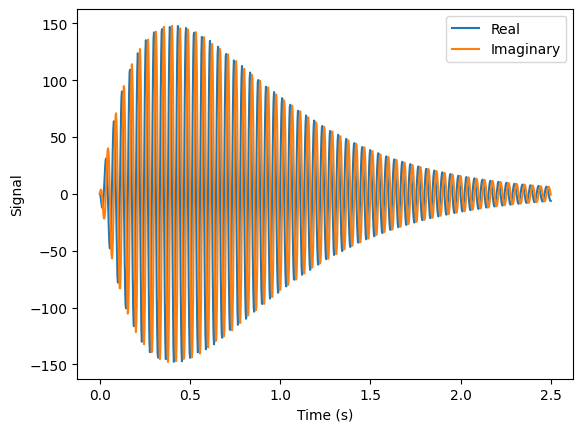

In [7]:
#Plot the signal
plt.figure()
plt.plot(times, signal.real, label='Real')
plt.plot(times, signal.imag, label='Imaginary')
plt.xlabel('Time (s)')
plt.ylabel('Signal')
plt.legend()
plt.show()



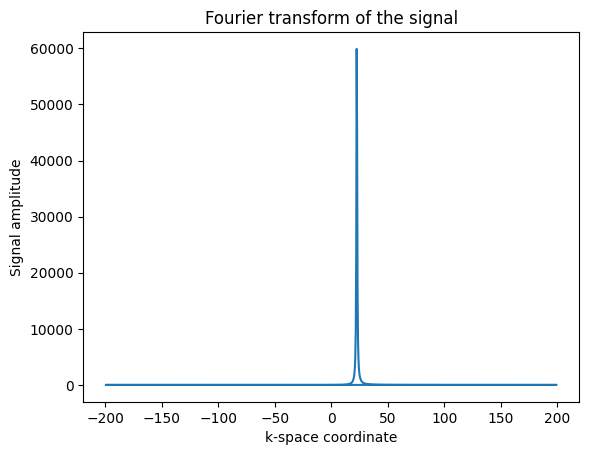

In [8]:
#Taking the fourier transform of the signal
k = np.fft.fftfreq(len(times), times[1] - times[0])  # k-space coordinates
k_signal = np.fft.fft(signal)  # Fourier transform of the signal

#Plotting the fourier transform
plt.plot(k, np.abs(k_signal))
plt.xlabel('k-space coordinate')
plt.ylabel('Signal amplitude')
plt.title('Fourier transform of the signal')
plt.show()

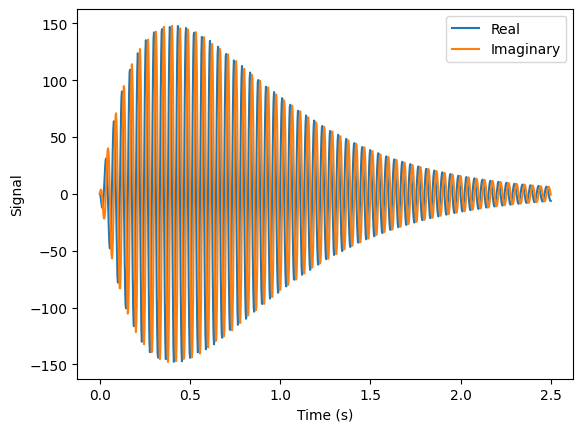

In [9]:
# Inverse Fourier transform to get the image
signal_1 = np.fft.ifft(k_signal)

#Plotting the image
plt.figure()
plt.plot(times, signal_1.real, label='Real')
plt.plot(times, signal_1.imag, label='Imaginary')
plt.xlabel('Time (s)')
plt.ylabel('Signal')
plt.legend()
plt.show()